# Análisis sobre profionales exlcuidos

Sobre [datos](https://gobiernoabierto.cordoba.gob.ar/data/datos-abiertos/categoria/exenciones/profesionales-excluidos/197) de la Municipalidad de Córdoba.

Nómina de profesionales excluidos

Documentación relacionada:
[Resolución Profesionales Exentos 06-17](https://gobiernoabierto.cordoba.gob.ar/media/cdn/Resoluci%C3%B3n_General_06-17_-_Exenciones_de_profesionales.pdf).  
[Resolución Prórroga 11-17](https://gobiernoabierto.cordoba.gob.ar/media/cdn/Resoluci%C3%B3n_General_11-17_-_Pr%C3%B3rroga_profesionales.pdf).  
  
### Aclaraciones
 - Aún falta la entrega de datos de algunos colegios profesionales
 - La obligatoriedad de matriculación y las normas son diferentes en cada profesión por lo que la lista publicada podría no incluir a todos los profesionales existentes.
  
**Importante**  
La publicación de la Nómina de Profesionales Excluidos ha sido discontinuada, de acuerdo a lo dispuesto por la [Resolución General 11/18](https://www.cordoba.gob.ar/wp-content/uploads/2018/04/rg-11-2018-profesionales.pdf).  


In [1]:
# Esta serie de datos se actualiza automáticamente vía el API de datos. 
# Podría automatizarse la deteccion de nuevos elemntos en la serie aquí:
# https://gobiernoabierto.cordoba.gob.ar/api/datos-abiertos/197/
#TODO automatizarlo

import requests
import os

csv_urls = {'2018-03': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1PQrcFTVzCB5rCKJ8FIKuF6dhhNWEyxzjsuzEJlPLG6o&exportFormat=csv&gid=819514763',
            '2018-01': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1tfjrLn3kA2kd_fVBSbcXk0su-onNw_QjKDXAyWoYqck&exportFormat=csv&gid=1836143984',
            '2017-11': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1A6BYpDQRdKfECfO6UHLm11sYwoyyy9pfZTdw_D-wYI0&exportFormat=csv&gid=0',
            '2017-09': 'https://docs.google.com/feeds/download/spreadsheets/Export?key=1ByqnW-29XBpNIBEIPNRM0hH_y55Vd1Owffk-78xxAWA&exportFormat=csv&gid=1343889109',
            # '2017-07': 'https://gobiernoabierto.cordoba.gob.ar/media/datos/N%C3%B3mina_de_profesionales_excluidos_-_Julio-2017.csv',
            '2017-05': 'https://gobiernoabierto.cordoba.gob.ar/media/datos/Nomina_de_profesionales_excluidos_-_Mayo-2017.csv',
            '2017-04': 'https://gobiernoabierto.cordoba.gob.ar/media/datos/Nomina_de_profesionales_excluidos_-_Abril-2017.csv'}

print('Buscando datos ...')
for mes, url in csv_urls.items():
    print('Buscando profesionales de {}'.format(mes))
    csv_file = 'data/profesionales-{}.csv'.format(mes)
    if os.path.isfile(csv_file):  # bajar los datos solo una vez
        print('Ya existe {}'.format(mes))
        continue
    print('Descargando {}'.format(mes))
    req = requests.get(url)
    f = open(csv_file, 'wb')
    f.write(req.content)
    f.close()
    print('Descargado OK {}'.format(mes))


Buscando datos ...
Buscando profesionales de 2018-03
Ya existe 2018-03
Buscando profesionales de 2018-01
Ya existe 2018-01
Buscando profesionales de 2017-11
Ya existe 2017-11
Buscando profesionales de 2017-09
Ya existe 2017-09
Buscando profesionales de 2017-05
Ya existe 2017-05
Buscando profesionales de 2017-04
Ya existe 2017-04


          CUIT          Denominación Profesión
0  20005848483  ORCHANSKY ALEJANDRO    Abogado
1  20029661759     BUSTAMANTE RAMON    Abogado
***** 2018-03 ******
Médico         12044
Contador       11208
Abogado        10230
Kinesiólogo     4884
Name: Profesión, dtype: int64
          CUIT          Denominación Profesión
0  20005848483  ORCHANSKY ALEJANDRO    Abogado
1  20029661759     BUSTAMANTE RAMON    Abogado
***** 2018-01 ******
Médico         12052
Contador       11208
Abogado        10245
Kinesiólogo     4915
Name: Profesión, dtype: int64
          CUIT         Denominación Profesión
0  20005848483  ORCHANSKY ALEJANDRO   Abogado
1  20029661759     BUSTAMANTE RAMON   Abogado
***** 2017-11 ******
Médico         11710
Contador       11207
Abogado        10174
Kinesiólogo     4881
Name: Profesión, dtype: int64
          CUIT         Denominación Profesión
0  20005848483  ORCHANSKY ALEJANDRO   Abogado
1  20029661759     BUSTAMANTE RAMON   Abogado
***** 2017-09 ******
Médico         1

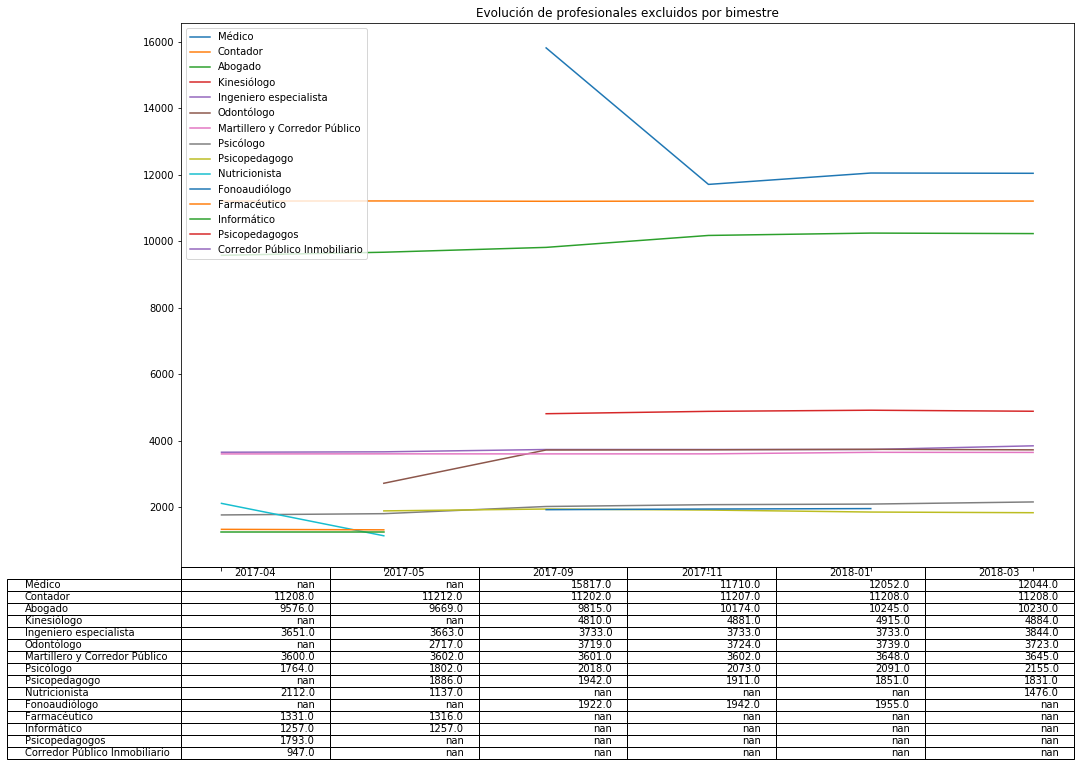

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import slugify

profesionales = {}
# los meses son mis columnas
columns = csv_urls.keys()
acumulados = {}
final = {}

for mes, url in csv_urls.items():
    csv_file = 'data/profesionales-{}.csv'.format(mes)
    profesionales[mes] = pd.read_csv(csv_file)
    if len(profesionales[mes].keys()) < 3:
        # debe tener punto y comas ... 
        profesionales[mes] = pd.read_csv(csv_file, sep=';')
    
    print(profesionales[mes].head(2))
    # profesionales[mes]['Profesión'].apply(slugify.slugify)
    # print(profesionales[mes].keys())
    acumulados[mes] = profesionales[mes]['Profesión'].value_counts()[:10]

    print('***** {} ******'.format(mes))
    print(acumulados[mes].head(4))
    for profesion, total in acumulados[mes].items():
        if profesion not in final.keys():
            final[profesion] = {}
        final[profesion][mes] = total
    
print(final)
df = pd.DataFrame(final)
# df.plot(kind='bar', figsize=[16,5])

df.plot(title='Evolución de profesionales excluidos por bimestre',
        kind='line',
        figsize=[16,10],
        legend=True,
        table=True)

          CUIT             Denominación Profesión       DNI       edad  etario
0  20005848483     ORCHANSKY ALEJANDRO    Abogado  00584848  76.897049      70
1  20029661759        BUSTAMANTE RAMON    Abogado  02966175  73.306008      70
2  20039932106    BIETTI ANGEL ALBERTO    Abogado  03993210  71.757239      70
3  20040971050  HABER ENRIQUE MAURICIO    Abogado  04097105  71.600566      70


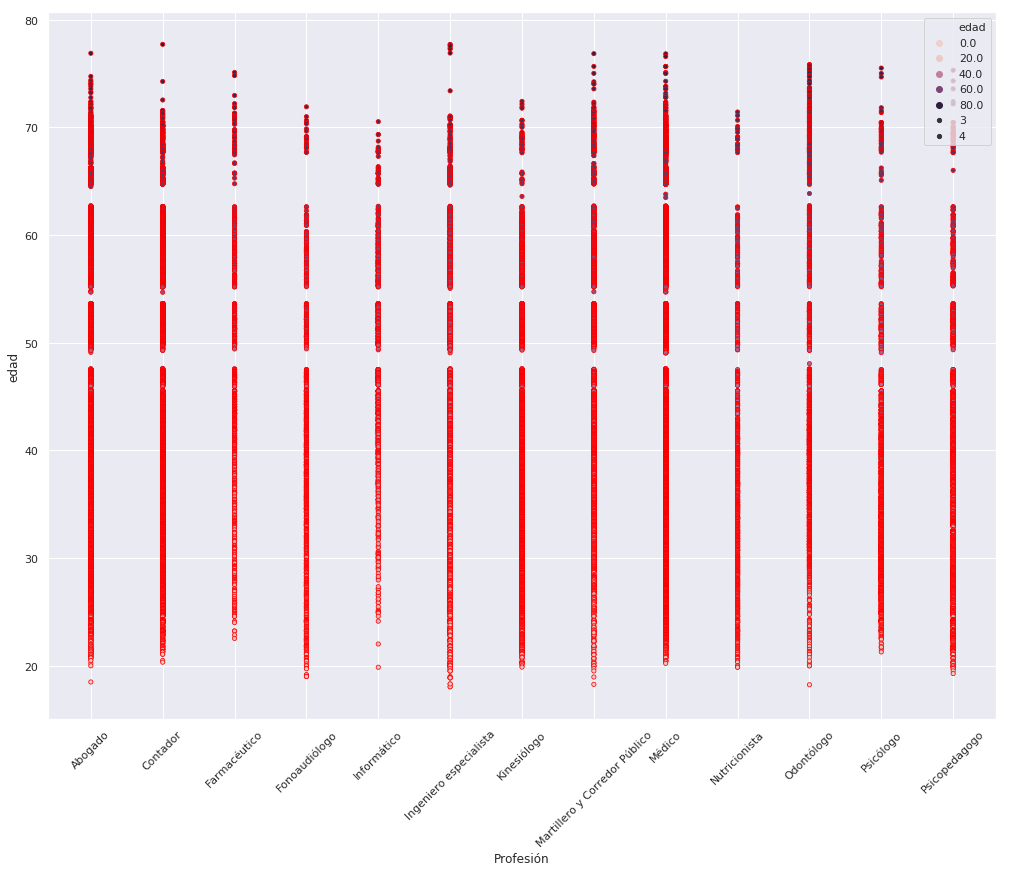

In [84]:
import seaborn as sns
sns.set()

#from matplotlib import rcParams
#rcParams['figure.figsize'] = 16, 5

# sns.set(rc={'figure.figsize':(16, 5)})

# Initialize Figure and Axes object
fig, ax = plt.subplots(figsize=(17,13))

profesiones = ['Médico', 'Contador', 'Abogado', 'Kinesiólogo', 'Ingeniero especialista',
               'Odontólogo', 'Martillero y Corredor Público', 'Psicólogo', 'Psicopedagogo',
               'Nutricionista', 'Fonoaudiólogo', 'Farmacéutico', 'Informático']
# p = profesionales['2018-03']
p = profesionales['2018-03']

def cuit_to_dni(cuit):
    return str(cuit)[2:-1]

def dni_to_edad(dni):
    edad = (-0.000001508 * float(dni)) + 77.779
    if edad < 18:
        edad = None  # no era un DNI posiblemente
    return edad

p['DNI'] = p['CUIT'].apply(cuit_to_dni)
p['edad'] = p['DNI'].apply(dni_to_edad)

print(p.head(4))
filter_varios = p['Profesión'].isin(profesiones)
varios = p[filter_varios]
# sns.relplot(x='Profesión', y='edad', data=varios, ax=ax)

sns.scatterplot(x='Profesión', y='edad', data=varios, ax=ax,
                size=4, edgecolor='red',
                hue='edad', linewidths=2)

plt.xticks(rotation=45)
plt.show()




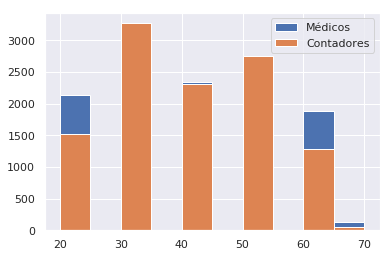

In [119]:
def edad_to_etario(edad):
    ret = '{}0'.format(str(edad)[:1])
    if ret.isnumeric():
        res = int(ret)
    else:
        res = 0
    return res 

p['etario'] = p['edad'].apply(edad_to_etario)

profesionales_ok = p[p.edad > 0]

medicos = profesionales_ok[profesionales_ok['Profesión']=='Médico']
contadores = profesionales_ok[profesionales_ok['Profesión']=='Contador']

plt.hist(medicos.etario)
plt.hist(contadores.etario)
plt.legend(labels=['Médicos', 'Contadores'])